<a href="https://colab.research.google.com/github/KAAVY/COVID-19/blob/master/covid_19_prediction_using_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARIMA
np.random.seed(12345)
import matplotlib as plt

In [0]:
covid_confirm = pd.read_csv('C:/Users/Ravichandran.M/Desktop/data_set/covid_19/Covid-19-Hackathon-master/covid_confirmed_daily_updates.csv')

In [0]:
covid_confirm = covid_confirm.rename(columns = {"Country/Region": "date"})

In [0]:
covid_confirm = covid_confirm.set_index('date')
covid_confirm

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
date,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,4,4,5,7,7,7,11,16,21,22
Albania,0,0,0,0,0,0,0,0,0,0,...,0,2,10,12,23,33,38,42,51,55
Algeria,0,0,0,0,0,0,0,0,0,0,...,19,20,20,20,24,26,37,48,54,60
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,39
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,274,322,384,459,459,802,1144,1145,1551,1960
Uruguay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,4,8,29
Uzbekistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,10


In [0]:
covid_confirm = covid_confirm.transpose()
ts = covid_confirm.index
ts

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20'],
      dtype='object')

Afghanistan


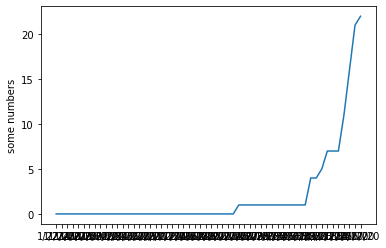

Albania


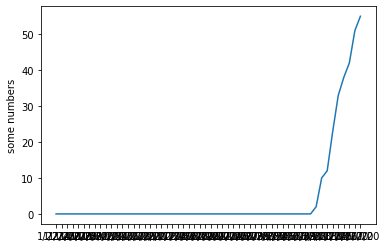

Algeria


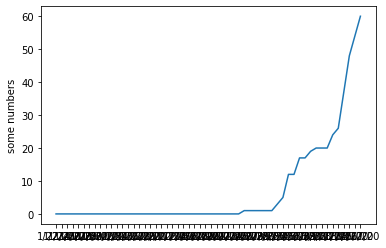

Andorra


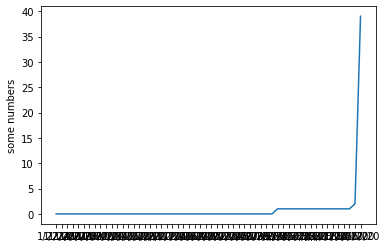

Antigua and Barbuda


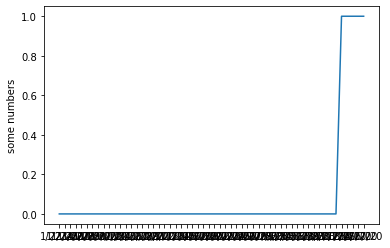

Argentina


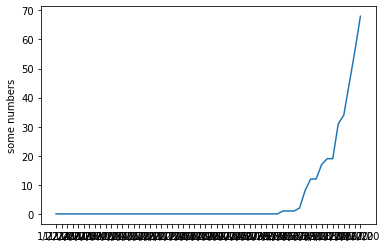

Armenia


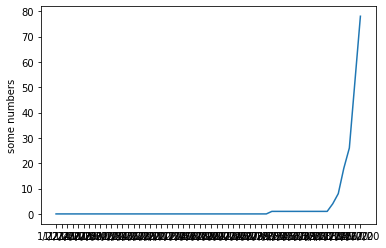

Aruba


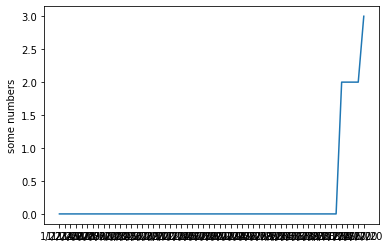

Australia


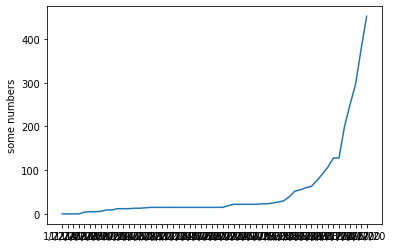

Austria


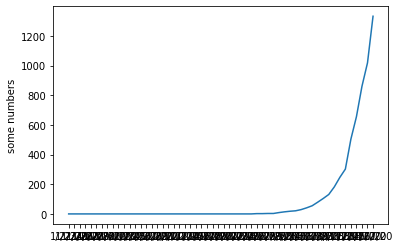

Azerbaijan


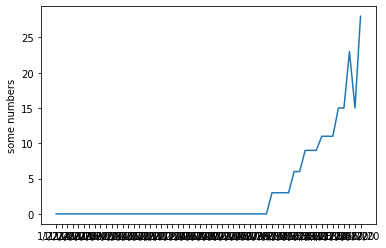

Bahrain


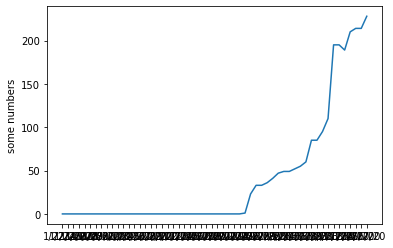

Bangladesh


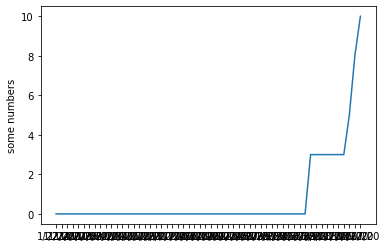

Barbados


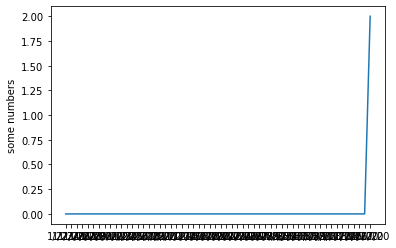

Belarus


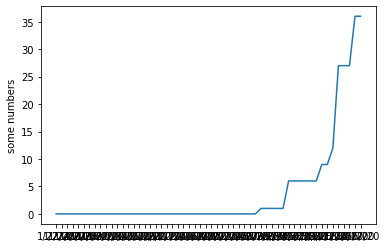

Belgium


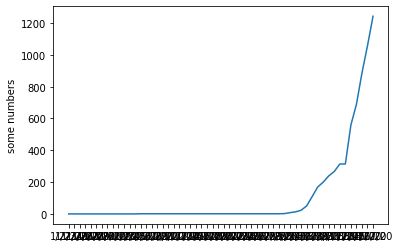

Benin


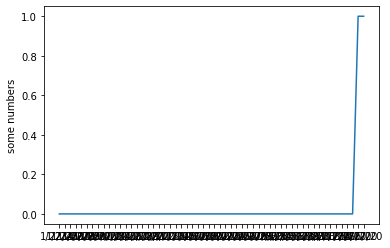

Bhutan


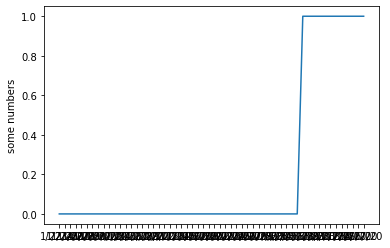

Bolivia


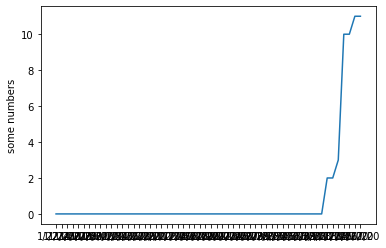

Bosnia and Herzegovina


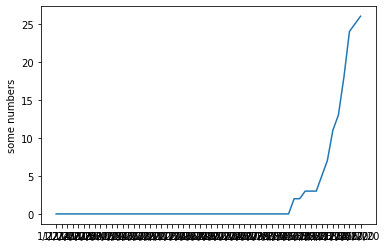

Brazil


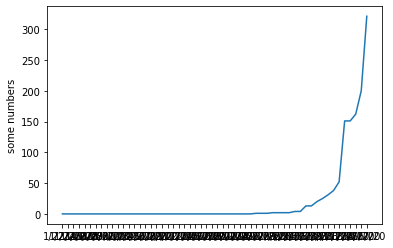

Brunei


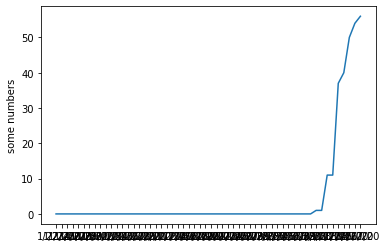

Bulgaria


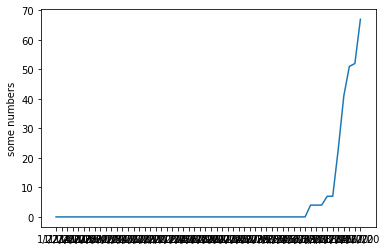

Burkina Faso


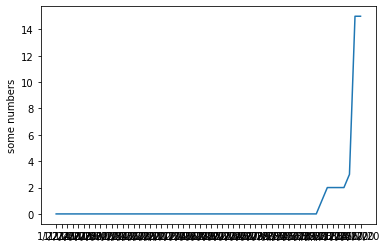

Cambodia


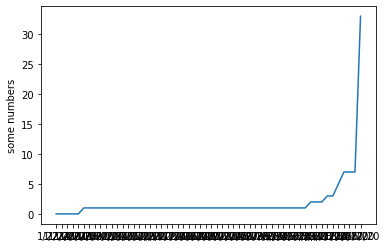

Cameroon


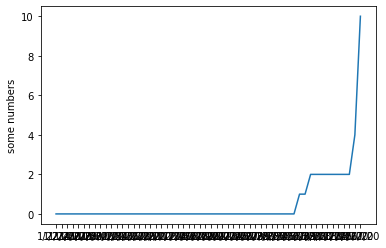

Canada


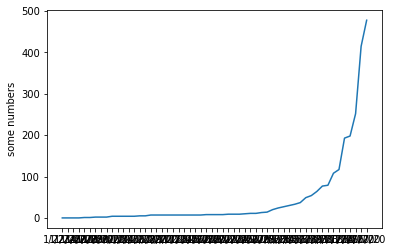

Central African Republic


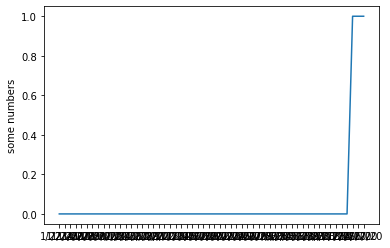

Chile


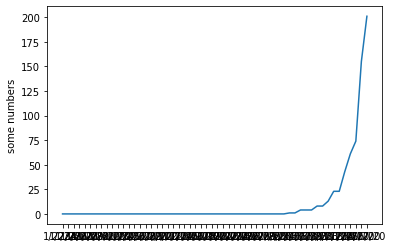

Colombia


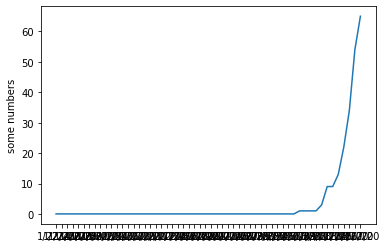

Congo (Brazzaville)


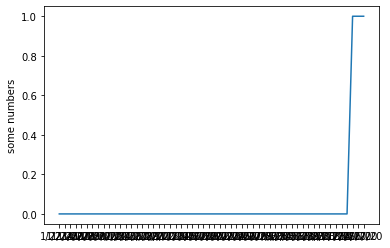

Congo (Kinshasa)


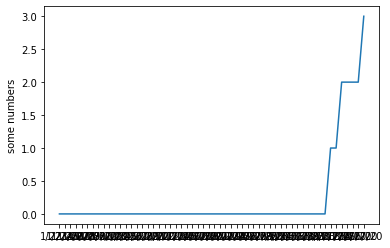

Costa Rica


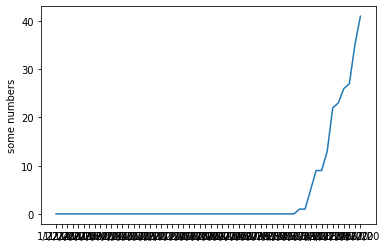

Cote d'Ivoire


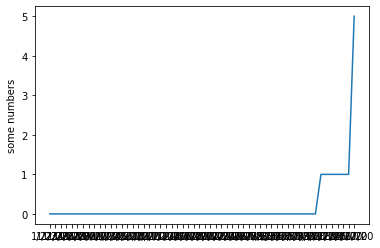

Croatia


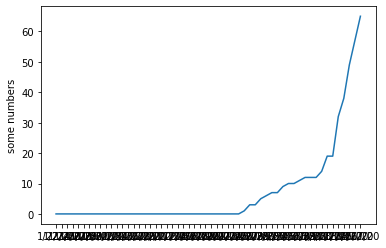

Cruise Ship


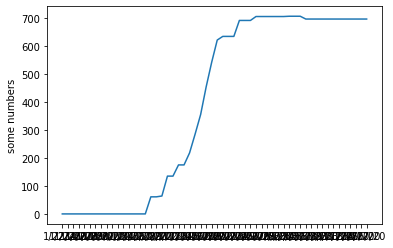

Cuba


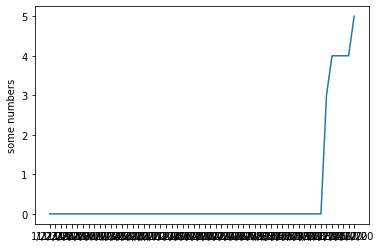

Cyprus


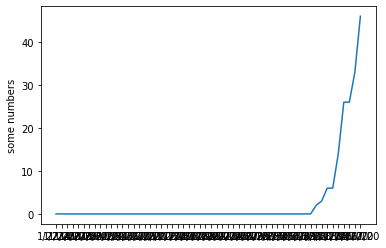

Czechia


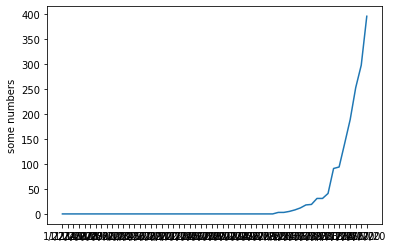

Denmark


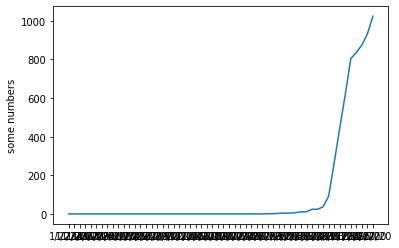

Dominican Republic


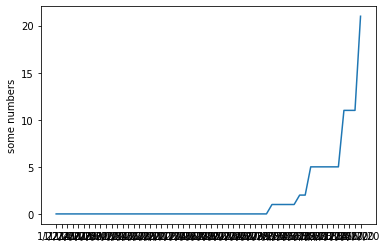

Ecuador


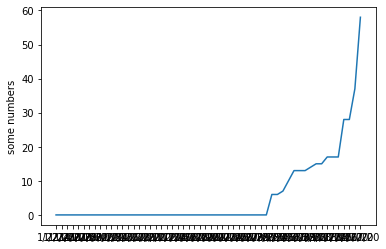

Egypt


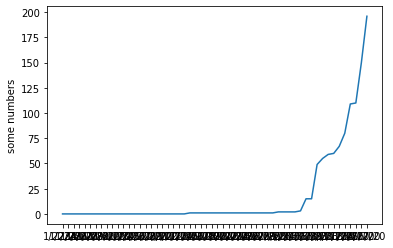

Equatorial Guinea


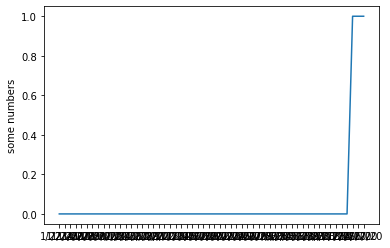

Estonia


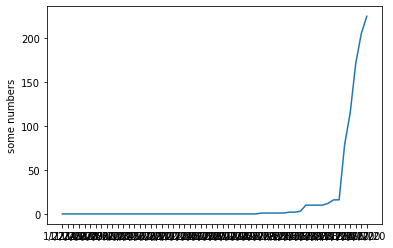

Eswatini


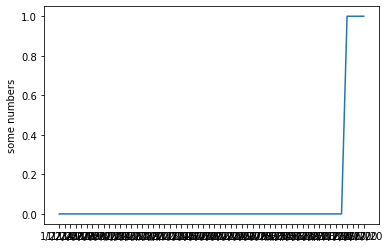

Ethiopia


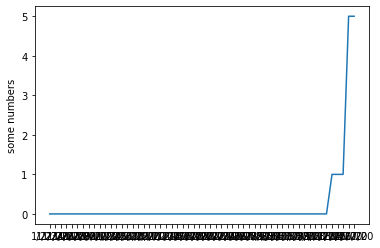

Finland


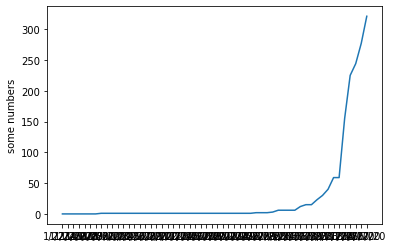

France


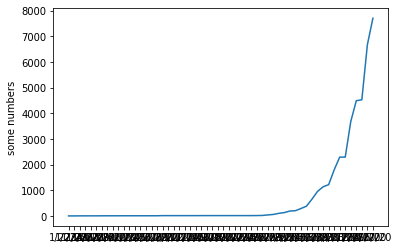

Gabon


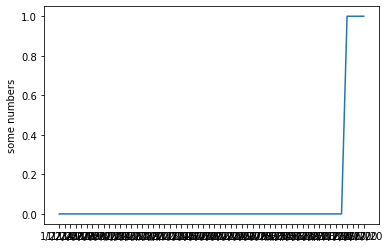

Georgia


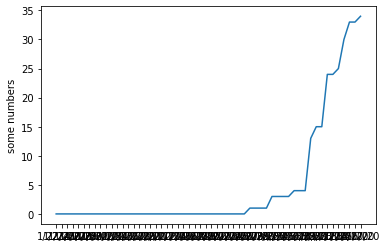

Germany


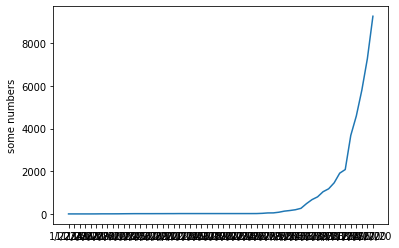

Ghana


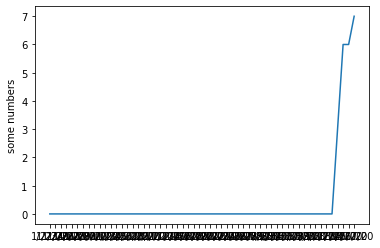

Greece


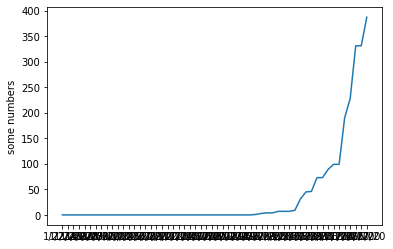

Greenland


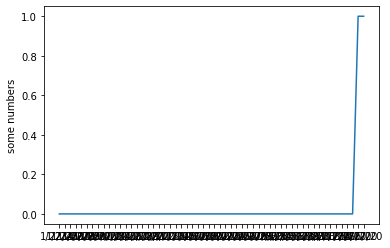

Guatemala


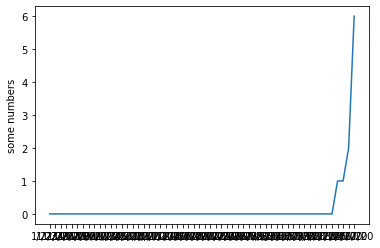

Guernsey


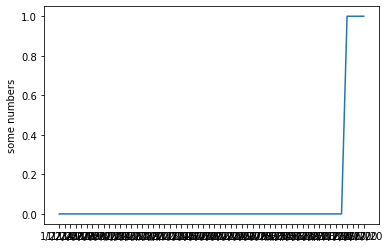

Guinea


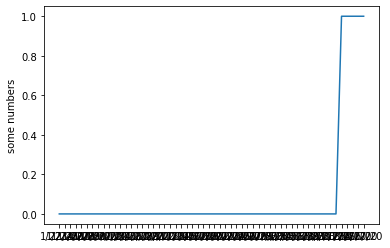

Guyana


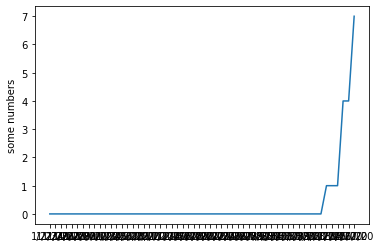

Holy See


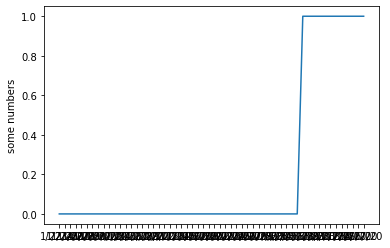

Honduras


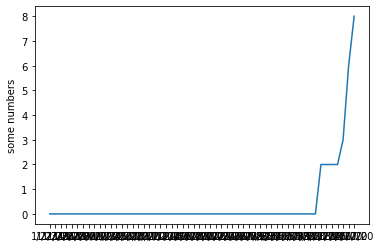

Hungary


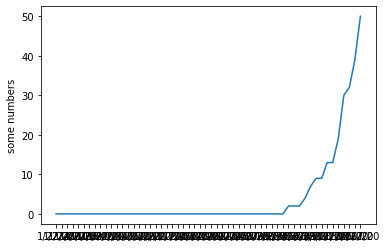

Iceland


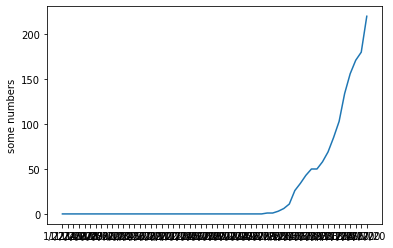

India


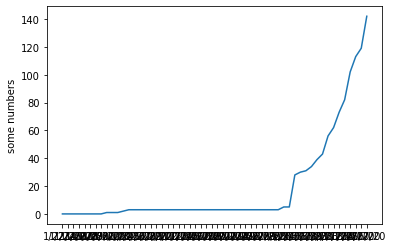

Indonesia


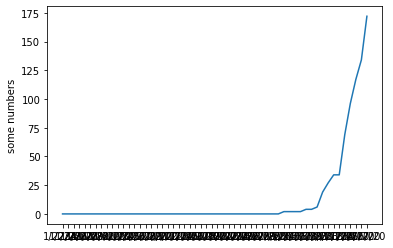

Iran


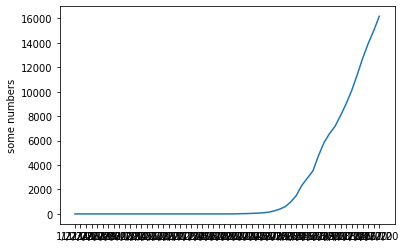

Iraq


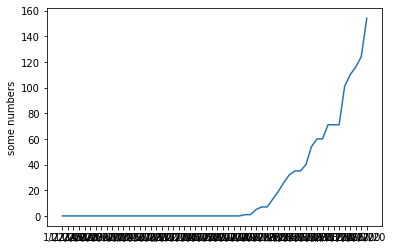

Ireland


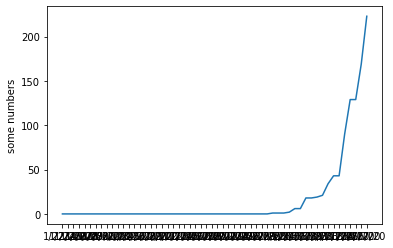

Israel


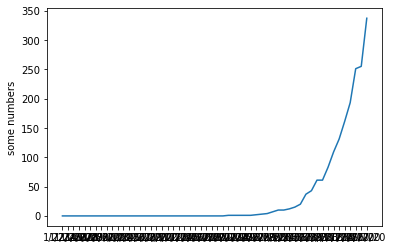

Italy


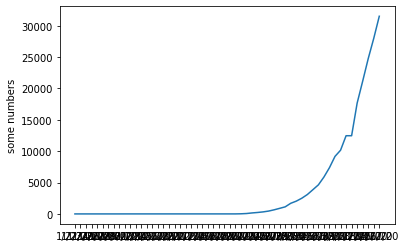

Jamaica


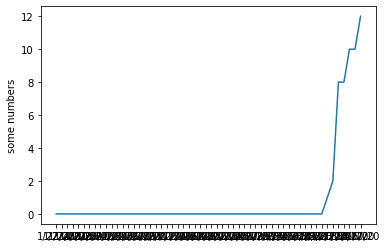

Japan


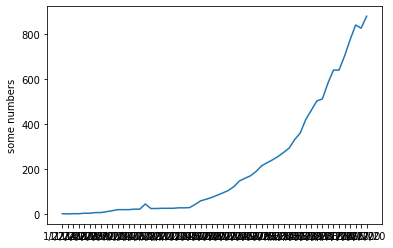

Jersey


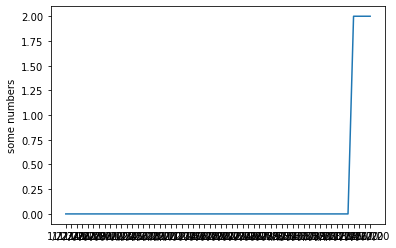

Jordan


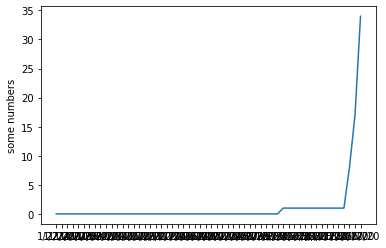

Kazakhstan


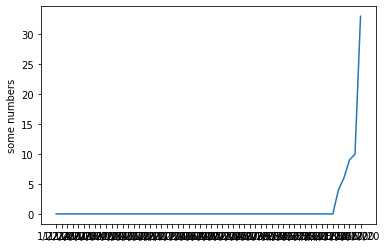

Kenya


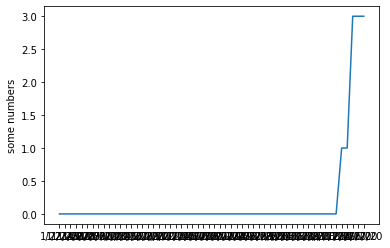

Korea, South


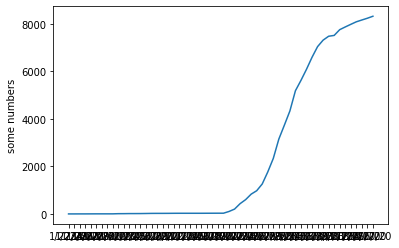

Kosovo


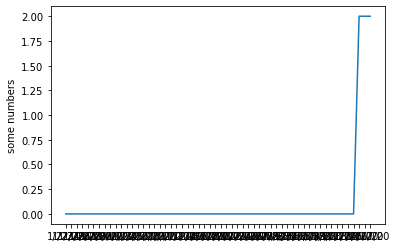

Kuwait


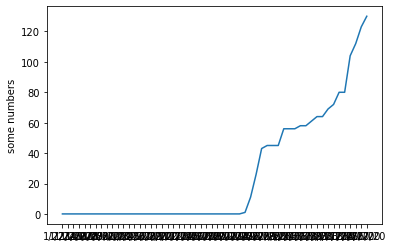

Latvia


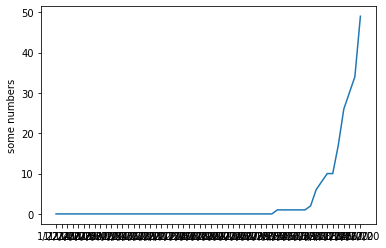

Lebanon


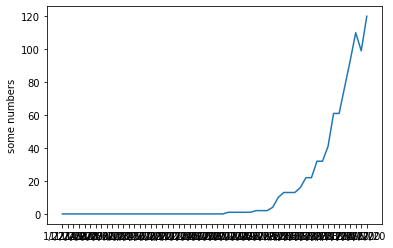

Liberia


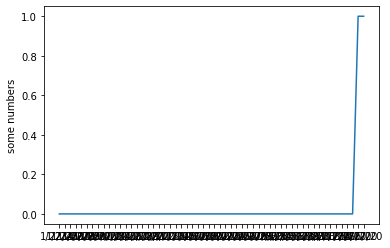

Liechtenstein


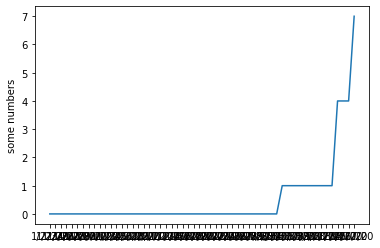

Lithuania


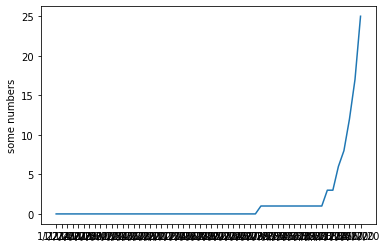

Luxembourg


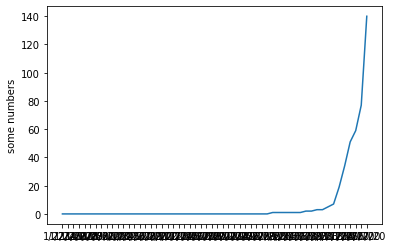

Mainland China


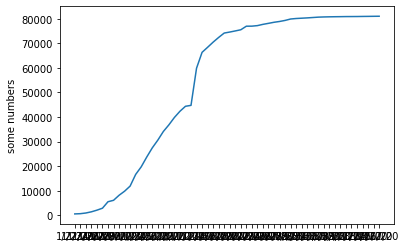

Malaysia


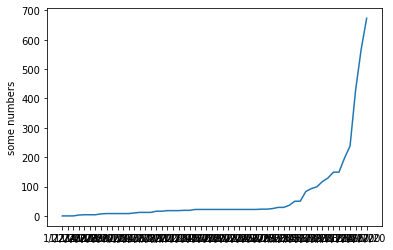

Maldives


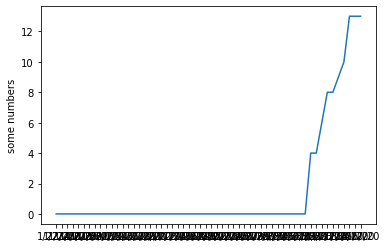

Malta


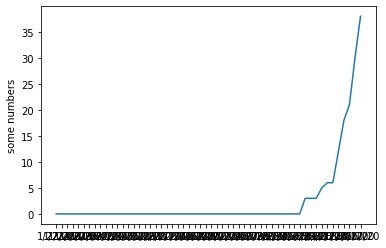

Martinique


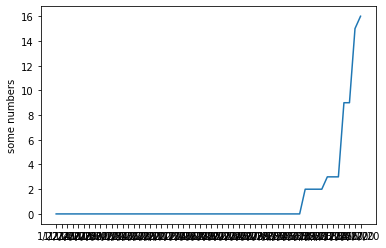

Mauritania


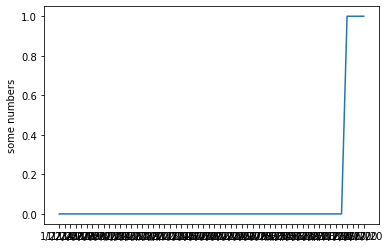

Mexico


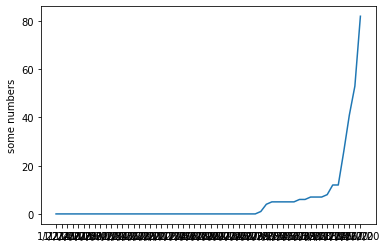

Moldova


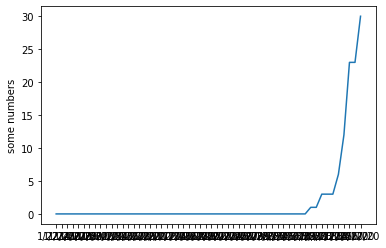

Monaco


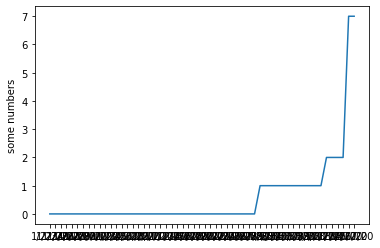

Mongolia


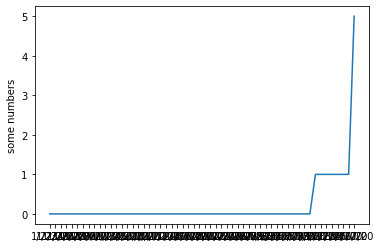

Montenegro


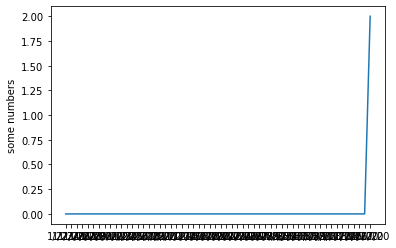

Morocco


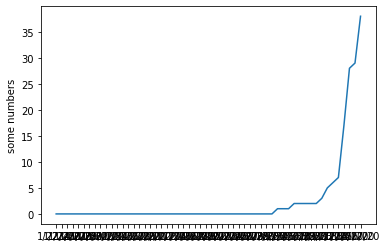

Namibia


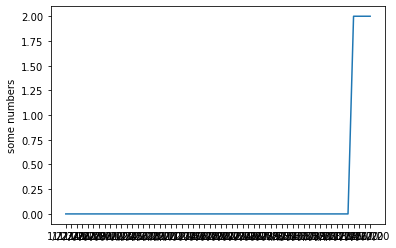

Nepal


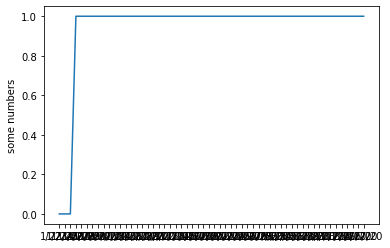

Netherlands


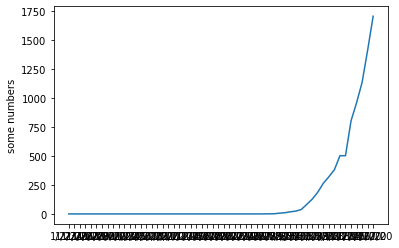

New Zealand


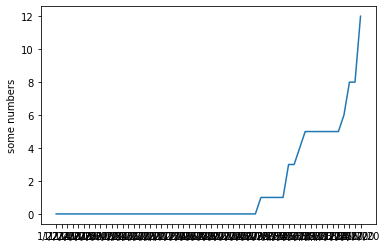

Nigeria


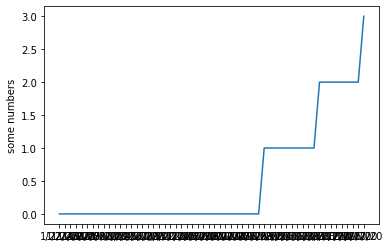

North Macedonia


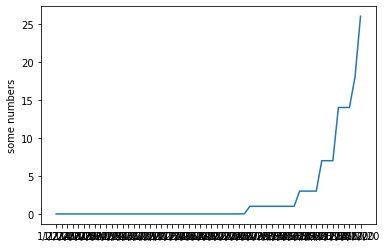

Norway


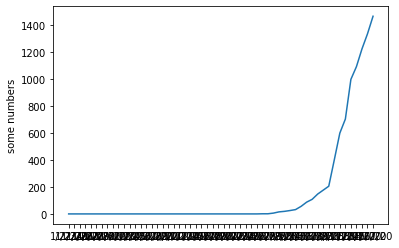

Oman


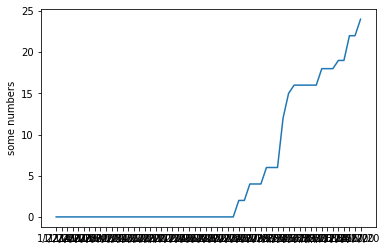

Pakistan


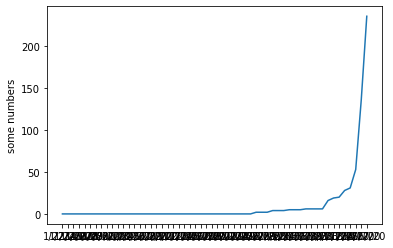

Panama


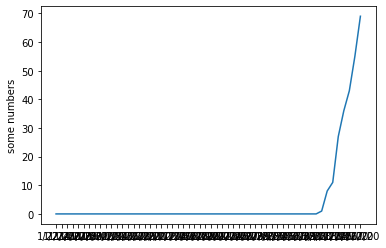

Paraguay


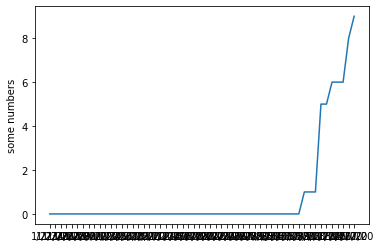

Peru


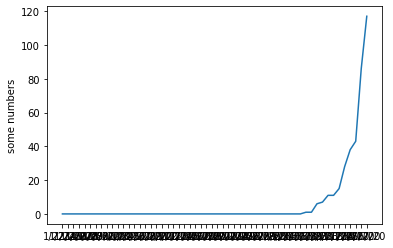

Philippines


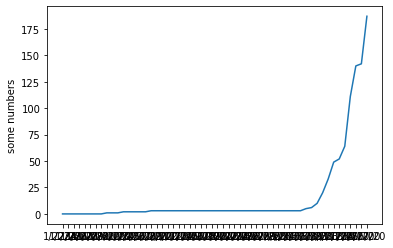

Poland


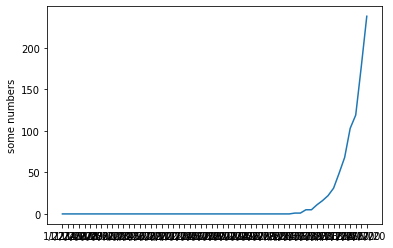

Portugal


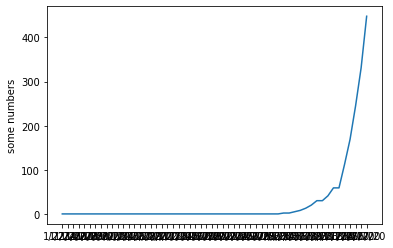

Qatar


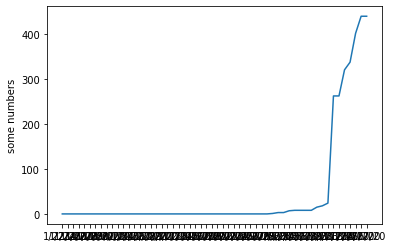

Republic of the Congo


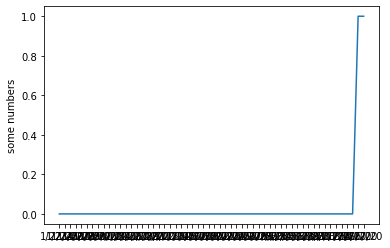

Romania


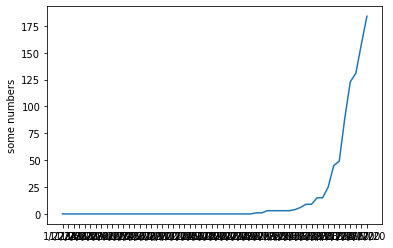

Russia


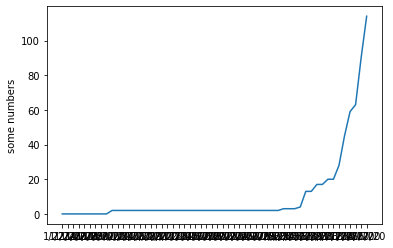

Rwanda


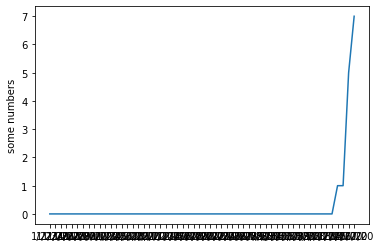

Saint Lucia


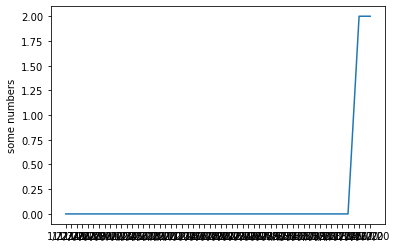

Saint Vincent and the Grenadines


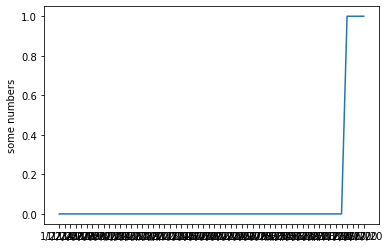

San Marino


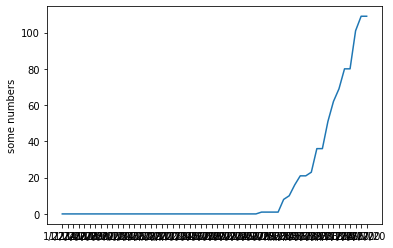

Saudi Arabia


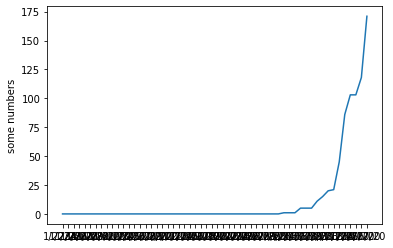

Senegal


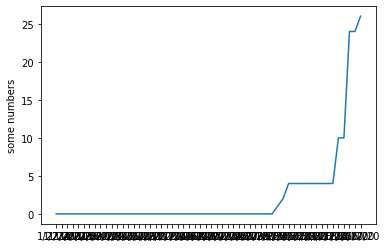

Serbia


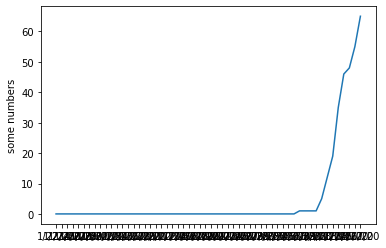

Seychelles


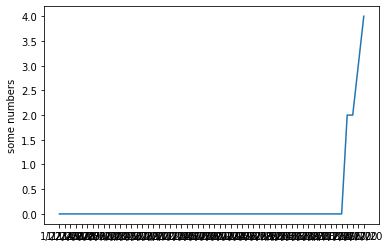

Singapore


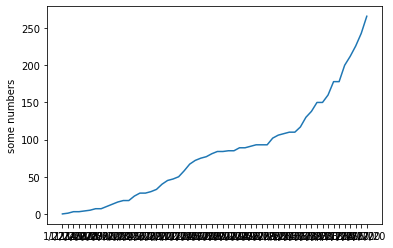

Slovakia


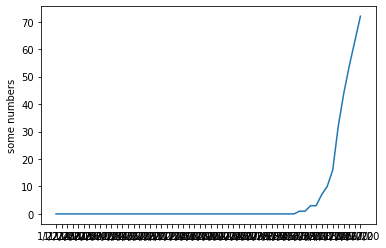

Slovenia


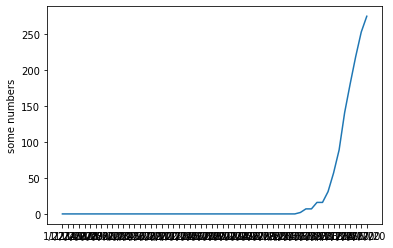

Somalia


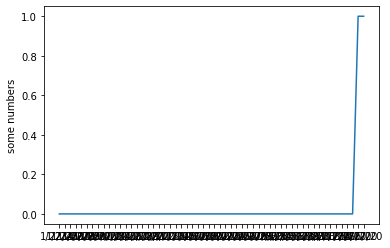

South Africa


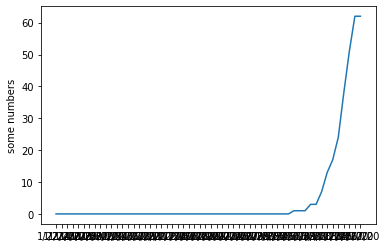

Spain


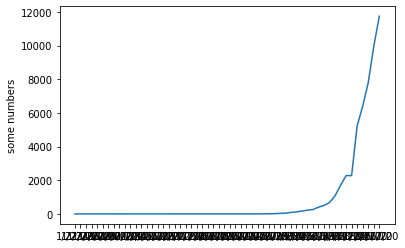

Sri Lanka


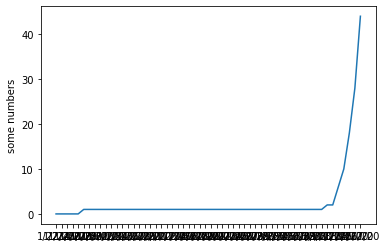

Sudan


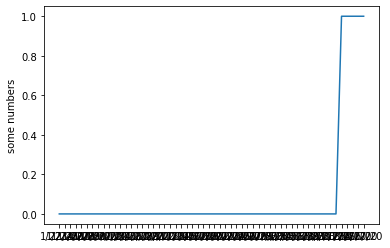

Suriname


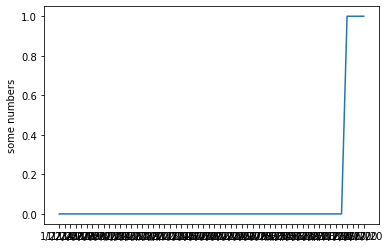

Sweden


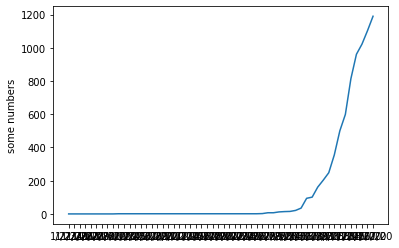

Switzerland


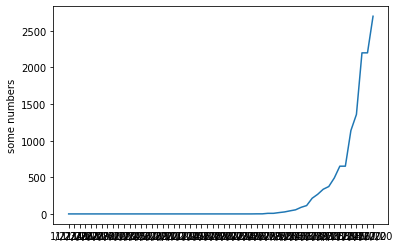

Taiwan


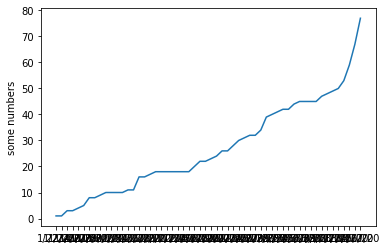

Tanzania


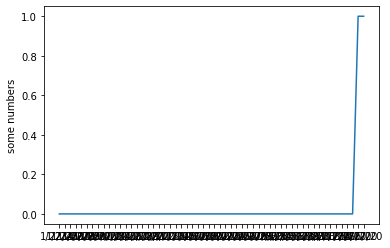

Thailand


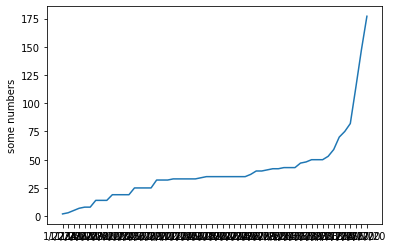

The Bahamas


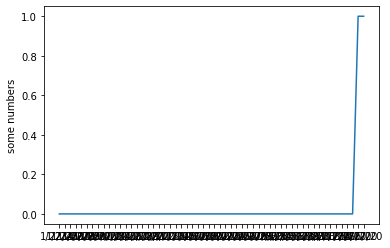

The Gambia


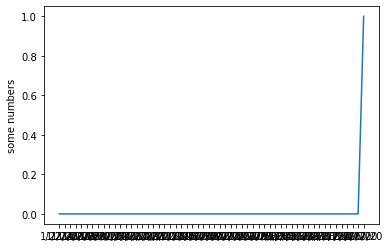

Togo


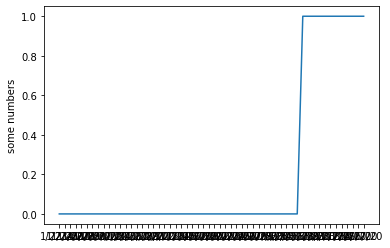

Trinidad and Tobago


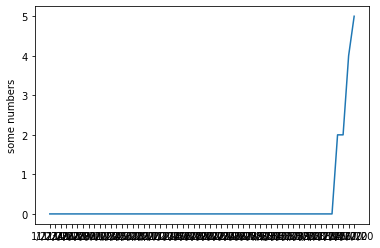

Tunisia


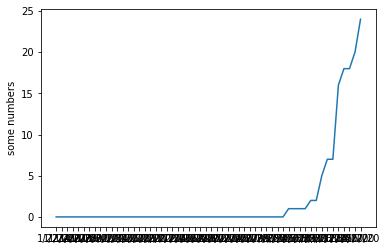

Turkey


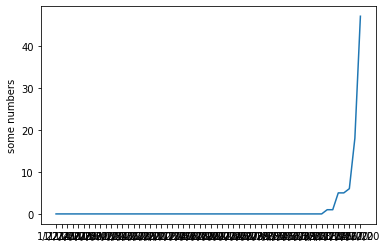

US


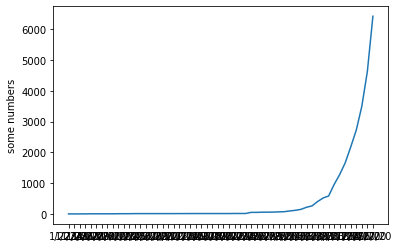

Ukraine


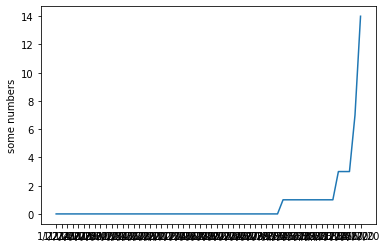

United Arab Emirates


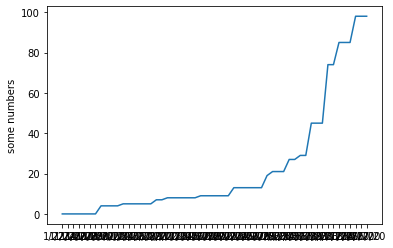

United Kingdom


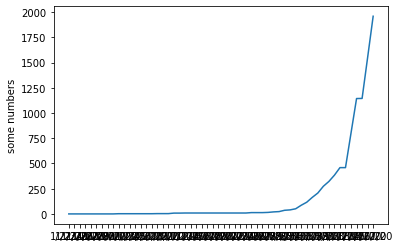

Uruguay


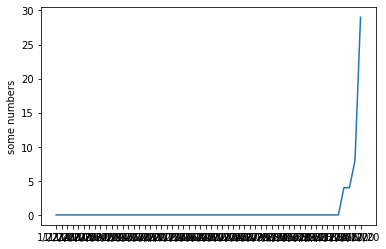

Uzbekistan


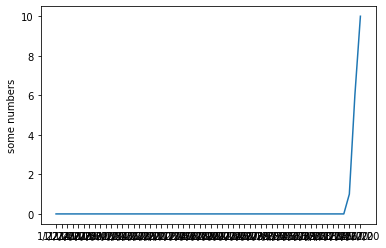

Venezuela


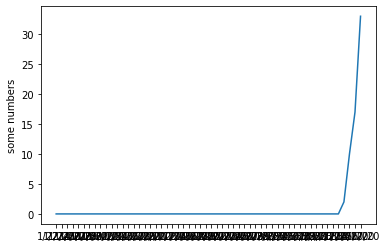

Vietnam


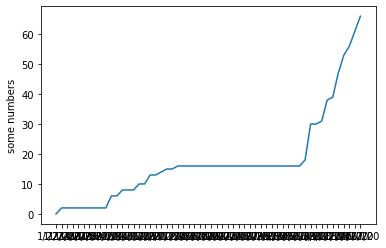

In [0]:
from matplotlib import pyplot as plt
for label, column in covid_confirm.iteritems():
    print(label)
    plt.plot(column)
    plt.ylabel('some numbers')
    plt.show()

In [0]:
def data(country):
    ts = covid_confirm[country]
    ts.head(10)
    from datetime import datetime
    ts[:'3/17/20']
    plt.plot(ts)

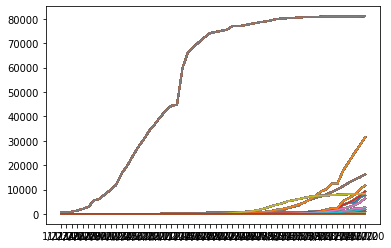

In [0]:
for label, column in covid_confirm.iteritems():
    ts_ = covid_confirm.columns
    #print(label)
    #pd.Series(ts_)
    #print (ts_)
    data(ts_)

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = pd.Series(timeseries).rolling(window=24).mean()
    rolstd = pd.Series(timeseries).rolling(window=24).std()
    plt.plot(ts, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
        
        
        
    

    
   

In [0]:
ts 
test_stationarity(ts)

DataError: No numeric types to aggregate

In [0]:
rolmean = pd.Series(ts).rolling(window=24).mean()
rolmean

In [0]:
rolstd = pd.Series(ts).rolling(window=24).std()
rolstd

In [0]:
 plt.plot(ts, color='blue',label='Original')

In [0]:
plt.plot(ts, color='blue',label='Original') 
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
print ('Results of Dickey-Fuller Test:')

In [0]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

RangeIndex(start=0, stop=56, step=1)

In [0]:

covid_confirm

,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,4,0,...,0,0,5,0,0,0,0,0,0,2
5,0,0,0,0,0,0,0,0,5,0,...,0,0,5,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,5,0,...,0,0,5,0,0,0,0,0,0,2
7,0,0,0,0,0,0,0,0,6,0,...,0,0,5,0,4,0,0,0,0,2
8,0,0,0,0,0,0,0,0,9,0,...,0,0,5,0,4,0,0,0,0,2
9,0,0,0,0,0,0,0,0,9,0,...,0,0,7,0,4,2,0,0,0,2
